In [1]:
%matplotlib inline


# Swirl


Image swirling is a non-linear image deformation that creates a whirlpool
effect.  This example describes the implementation of this transform in
``skimage``, as well as the underlying warp mechanism.

Image warping
-------------
When applying a geometric transformation on an image, we typically make use of
a reverse mapping, i.e., for each pixel in the output image, we compute its
corresponding position in the input.  The reason is that, if we were to do it
the other way around (map each input pixel to its new output position), some
pixels in the output may be left empty.  On the other hand, each output
coordinate has exactly one corresponding location in (or outside) the input
image, and even if that position is non-integer, we may use interpolation to
compute the corresponding image value.

Performing a reverse mapping
----------------------------
To perform a geometric warp in ``skimage``, you simply need to provide the
reverse mapping to the :py:func:`skimage.transform.warp` function. E.g., consider
the case where we would like to shift an image 50 pixels to the left. The reverse
mapping for such a shift would be::

    def shift_left(xy):
        xy[:, 0] += 50
        return xy

The corresponding call to warp is::

    from skimage.transform import warp
    warp(image, shift_left)

The swirl transformation
------------------------
Consider the coordinate $(x, y)$ in the output image.  The reverse
mapping for the swirl transformation first computes, relative to a center
$(x_0, y_0)$, its polar coordinates,

\begin{align}\theta = \arctan(y/x)

    \rho = \sqrt{(x - x_0)^2 + (y - y_0)^2},\end{align}

and then transforms them according to

\begin{align}r = \ln(2) \, \mathtt{radius} / 5

    \phi = \mathtt{rotation}

    s = \mathtt{strength}

    \theta' = \phi + s \, e^{-\rho / r + \theta}\end{align}

where ``strength`` is a parameter for the amount of swirl, ``radius`` indicates
the swirl extent in pixels, and ``rotation`` adds a rotation angle.  The
transformation of ``radius`` into $r$ is to ensure that the
transformation decays to $\approx 1/1000^{\mathsf{th}}$ within the
specified radius.




/Users/robincole/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:412: UserWarning: The default of `mode` in `skimage.transform.swirl` will change to `reflect` in version 0.15.
  warn('The default of `mode` in `skimage.transform.swirl` '


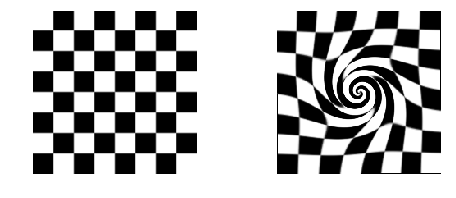

In [2]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import swirl


image = data.checkerboard()
swirled = swirl(image, rotation=0, strength=10, radius=120)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray, interpolation='none')
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray, interpolation='none')
ax1.axis('off')

plt.show()